# Student : Hiroto YAMAKAWA
 - MS BGD 2019 - 2020
 - Course : MDI341 - Advanced Machine Learning

# Introduction


## Challenge Large Scale Machine Learning

### Authors of the Challenge: 
#### Pavlo Mozharovskyi (pavlo.mozharovskyi@telecom-paris.fr), Stephan Clémençon, Jayant Sen Gupta


# **Functional anomaly detection**

**Anomaly detection** (or **outlier detection**) comprises the **machine learning** methods aimed at identification of observations that exhibit suspicious behaviour and are very likely to cause a problem. In the **unsupervised learning** framework, no label indicating whether a training observation is anomalous or not is available. Hence, anomalies should be identified in an automatic way by learning the *normal* behavior, that of the vast majority of the observations, and considering those differing significantly from it as *abnormal*. Logically, anomalies are rare in the data and thus fall in *low density* regions: anomaly detection thus boils down to identifying the *tail* of the distribution.

With the ubiquitous deployment of sensors monitoring nearly continuously the health of complex infrastructures, **anomaly detection** can now rely on measurements sampled at a very high frequency, providing a very rich representation of the phenomenon under surveillance. In order to exploit fully the collected information, the observations cannot be treated as multivariate data anymore and a functional analysis approach is required.

A (very) short list of **literature** regarding functional anomaly detection can include:
 - J.O. Ramsay, Silverman, B.W. (2005): Functional Data Analysis. Springer-Verlag, New-York.
 - Ferraty, F., Vieu, P. (2006): Nonparametric Functional Data Analysis: Theory and Practice. Springer Science & Business Media.
 - Chandola, V., Banerjee, A., Kumar, V. (2009): Anomaly detection: A survey. ACM Computing Surveys (CSUR) 41(3), 1-58.
 - Hubert, M., Rousseeuw, P.J., Segaert, P. (2015): Multivariate functional outlier detection. Statistical Methods & Applications 24(2), 177-202.
 - Wang, J.L., Chiou, J.M., Müller, H.G. (2016): Functional data analysis. Annual Review of Statistics and Its Application 3, 257-295.

# The properties of the dataset:


The data set is provided by the Airbus and consistst of the measures of the accelerometer of helicopters during  1 minute at frequency 1024 Hertz, which yields time series measured at in total 60 * 1024 = 61440 equidistant time points.

### Training data: 

The training set consists of one file, **airbus_train.csv**.

File **airbus_train.csv** contains one observation per row, each observation having 61440 entries, measures with equivalent time distance of 1 / 1024 seconds.

There are in total 1677 training observations.

### Test data:

The training set consists of one file, **airbus_test.csv**, which has the same structure as file **airbus_train.csv**.

There are in total 2511 test observations.

### Remark:

The task of the **unsupervised anomaly detection** is difficult, in the sense that, strictly speaking, your only feedback will be your score calculated by the submission website.

## The performance criterion:

You should submit a file that contains in each row anomaly score for the observation in the corresponding row of the file **airbus_test.csv**. For a sample submission please see the codes below. Please note, that your score should provide ordering which allows to identify anomalies, i.e. the higher the value of the score, the **more abnormal** the observation should be considered.

The performance criterion is the **Area Under the Receiver Operating Characteristic** (AUC), see also:
https://en.wikipedia.org/wiki/Receiver_operating_characteristic#Area_under_the_curve

# Training Data

Training data, input (file **airbus_train.csv**): https://partage.imt.fr/index.php/s/zqrRggLBY8GRc9i

# Test Data 

Training data, output (file **airbus_test.csv**): https://partage.imt.fr/index.php/s/WpiqcjMq8ymg8zA

# Example submission

# A Summary of how I proceeded


1 - **Packages used**: I tried to use some external packages. Even though they were not exploited later in my works for various reasons, I listed them as part of my works. 


2 - **Data exploration**: Datasets were quickly explored to understand what they look like.


3 - **Feature Engineering**: I spent most of my time trying to extract interesting features and testing various combinations with them, using descriptive statistics. Improving my knowledge in Signal Processing would have been beneficial into creating other useful features.


4 - **Models tested**: For this Datachallenge, several algorithm  and methods were tested. Hyperparameters were tuned by submitting results and checking whether the score was increasing or decreasing.

**Conclusion**: Unsupervised Anomaly Detection is challenging. Best score was obtained with a One-Class SVM - **0.802305424747** 


More details can be found as '**Comments**' in each Subsection below


## **0 - Import libraries and Load the data**

In [0]:
import pandas as pd
import numpy as np
from numpy import cumsum, log, polyfit, sqrt, std, subtract
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn import svm
from scipy.stats import kurtosis, skew ,zscore, median_absolute_deviation 
#from entropy import *
import statsmodels
from statsmodels.tsa import stattools, seasonal
from scipy import fftpack

In [20]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
path = '/content/drive/My Drive/Colab Notebooks/Data Challenge MDI341/'

xtrain = np.loadtxt(path +'airbus_train.csv', delimiter= ' ')
print(xtrain.shape)
xtest = np.loadtxt(path+ 'airbus_test.csv', delimiter= ' ')
print(xtest.shape)

(1677, 61440)
(2511, 61440)


In [0]:
#To DataFrame
xtrain = pd.DataFrame(xtrain)
xtest = pd.DataFrame(xtest)

## **1 - Packages tried**


### 1.1 - TSFResh 

**Comments** : This package is intended to calculate useful features for timeseries variables. However, it seemed to be computationally expensive and I was only able to make it run for a few observations. As an alternative, I tried to extract some interesting features to exploit from the docs and the code source. 


In [0]:
!pip install tsfresh

     |████████████████████████████████| 81kB 2.3MB/s 
  Created wheel for locket: filename=locket-0.2.0-cp36-none-any.whl size=4040 sha256=94bafc601e2191b45010e2ab67008103479e5c11e4321a34376feb3b36fe27b5
  Stored in directory: /root/.cache/pip/wheels/26/1e/e8/4fa236ec931b1a0cdd61578e20d4934d7bf188858723b84698
Successfully built locket


In [0]:
from tsfresh import extract_features

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
xtrain_stacked = pd.DataFrame(xtrain.iloc[:,:2000].stack()).reset_index()


In [0]:
xtrain_stacked

,level_0,level_1,0
0,0,0,0.047464
1,0,1,0.053532
2,0,2,0.026405
3,0,3,0.001486
4,0,4,-0.006983
...,...,...,...
3353995,1676,1995,0.005721
3353996,1676,1996,0.033250
3353997,1676,1997,-0.028257
3353998,1676,1998,-0.053040


In [0]:
#trial on one 
x_train0 = xtrain_stacked[xtrain_stacked.level_0 <=3 ]  

In [0]:
extracted_features = extract_features(x_train0, column_id="level_0", column_sort="level_1", column_kind=None, column_value=0)


Feature Extraction: 100%|██████████| 4/4 [00:12<00:00,  3.06s/it]


In [0]:
extracted_features

variable,0__abs_energy,0__absolute_sum_of_changes,"0__agg_autocorrelation__f_agg_""mean""__maxlag_40","0__agg_autocorrelation__f_agg_""median""__maxlag_40","0__agg_autocorrelation__f_agg_""var""__maxlag_40","0__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","0__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""rvalue""","0__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""slope""","0__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""stderr""","0__agg_linear_trend__f_agg_""max""__chunk_len_50__attr_""intercept""","0__agg_linear_trend__f_agg_""max""__chunk_len_50__attr_""rvalue""","0__agg_linear_trend__f_agg_""max""__chunk_len_50__attr_""slope""","0__agg_linear_trend__f_agg_""max""__chunk_len_50__attr_""stderr""","0__agg_linear_trend__f_agg_""max""__chunk_len_5__attr_""intercept""","0__agg_linear_trend__f_agg_""max""__chunk_len_5__attr_""rvalue""","0__agg_linear_trend__f_agg_""max""__chunk_len_5__attr_""slope""","0__agg_linear_trend__f_agg_""max""__chunk_len_5__attr_""stderr""","0__agg_linear_trend__f_agg_""mean""__chunk_len_10__attr_""intercept""","0__agg_linear_trend__f_agg_""mean""__chunk_len_10__attr_""rvalue""","0__agg_linear_trend__f_agg_""mean""__chunk_len_10__attr_""slope""","0__agg_linear_trend__f_agg_""mean""__chunk_len_10__attr_""stderr""","0__agg_linear_trend__f_agg_""mean""__chunk_len_50__attr_""intercept""","0__agg_linear_trend__f_agg_""mean""__chunk_len_50__attr_""rvalue""","0__agg_linear_trend__f_agg_""mean""__chunk_len_50__attr_""slope""","0__agg_linear_trend__f_agg_""mean""__chunk_len_50__attr_""stderr""","0__agg_linear_trend__f_agg_""mean""__chunk_len_5__attr_""intercept""","0__agg_linear_trend__f_agg_""mean""__chunk_len_5__attr_""rvalue""","0__agg_linear_trend__f_agg_""mean""__chunk_len_5__attr_""slope""","0__agg_linear_trend__f_agg_""mean""__chunk_len_5__attr_""stderr""","0__agg_linear_trend__f_agg_""min""__chunk_len_10__attr_""intercept""","0__agg_linear_trend__f_agg_""min""__chunk_len_10__attr_""rvalue""","0__agg_linear_trend__f_agg_""min""__chunk_len_10__attr_""slope""","0__agg_linear_trend__f_agg_""min""__chunk_len_10__attr_""stderr""","0__agg_linear_trend__f_agg_""min""__chunk_len_50__attr_""intercept""","0__agg_linear_trend__f_agg_""min""__chunk_len_50__attr_""rvalue""","0__agg_linear_trend__f_agg_""min""__chunk_len_50__attr_""slope""","0__agg_linear_trend__f_agg_""min""__chunk_len_50__attr_""stderr""","0__agg_linear_trend__f_agg_""min""__chunk_len_5__attr_""intercept""","0__agg_linear_trend__f_agg_""min""__chunk_len_5__attr_""rvalue""","0__agg_linear_trend__f_agg_""min""__chunk_len_5__attr_""slope""",...,0__ratio_beyond_r_sigma__r_6,0__ratio_beyond_r_sigma__r_7,0__ratio_value_number_to_time_series_length,0__sample_entropy,0__skewness,0__spkt_welch_density__coeff_2,0__spkt_welch_density__coeff_5,0__spkt_welch_density__coeff_8,0__standard_deviation,0__sum_of_reoccurring_data_points,0__sum_of_reoccurring_values,0__sum_values,0__symmetry_looking__r_0.0,0__symmetry_looking__r_0.05,0__symmetry_looking__r_0.1,0__symmetry_looking__r_0.15000000000000002,0__symmetry_looking__r_0.2,0__symmetry_looking__r_0.25,0__symmetry_looking__r_0.30000000000000004,0__symmetry_looking__r_0.35000000000000003,0__symmetry_looking__r_0.4,0__symmetry_looking__r_0.45,0__symmetry_looking__r_0.5,0__symmetry_looking__r_0.55,0__symmetry_looking__r_0.6000000000000001,0__symmetry_looking__r_0.65,0__symmetry_looking__r_0.7000000000000001,0__symmetry_looking__r_0.75,0__symmetry_looking__r_0.8,0__symmetry_looking__r_0.8500000000000001,0__symmetry_looking__r_0.9,0__symmetry_looking__r_0.9500000000000001,0__time_reversal_asymmetry_statistic__lag_1,0__time_reversal_asymmetry_statistic__lag_2,0__time_reversal_asymmetry_statistic__lag_3,0__value_count__value_-1,0__value_count__value_0,0__value_count__value_1,0__variance,0__variance_larger_than_standard_deviation
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,3.285909,31.468636,0.021018,-0.049504,0.070929,0.057991,0.258974,0

### 1.2 - Entropy

**Comments**: Functions used are included in the Feature engineering section below.
However, including those entropy features didn't improve the score of the model.

In [0]:
#https://github.com/raphaelvallat/entropy
!git clone https://github.com/raphaelvallat/entropy.git entropy/
%cd entropy/
!pip install -r requirements.txt
!python setup.py develop

## **2 - Data Exploration**

### 2.1 - a sample plot

**Comments**: a sample plot of the first 3 observations to see what they looked like

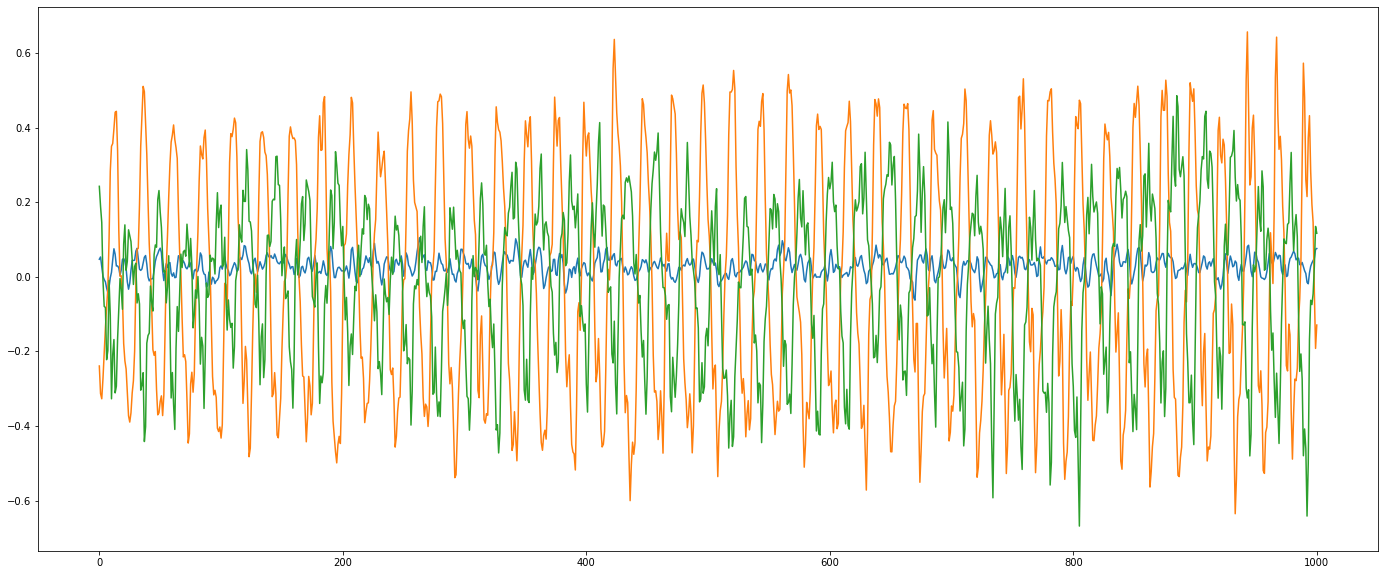

In [0]:
plt.figure(figsize = (24,10))
plt.plot(xtrain.loc[0,:1000])
plt.plot(xtrain.loc[1,:1000])
plt.plot(xtrain.loc[2,:1000])

### 2.2 - Mean - STD scatter plot

**Comments** : Plotting the variation of the standard Deviation with mean allowed me to see an interesting pattern : While each observation of the train set looks has it's mean centered around 0 and the standard deviation ranging from 0 to 8, observations from the test set follow different pattern. This symetry gave me the idea to try and use absolute values to see if anything was different. However, using the absolute values to make the prediction didn't improve the scores

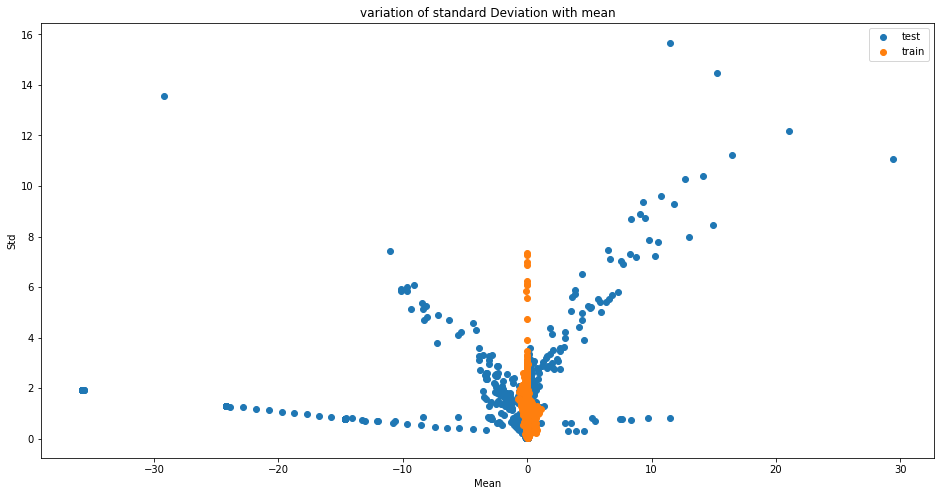

In [7]:
#after scaling the values with StandardScaler()

xtrain_mean = xtrain.mean(axis=1)
xtrain_std = xtrain.std(axis=1)
df_xtrain_mean= pd.DataFrame(xtrain_mean, columns = ['mean'])
df_xtrain_std= pd.DataFrame(xtrain_std, columns = ['std'])

xtest_mean = xtest.mean(axis=1)
xtest_std = xtest.std(axis=1)
df_xtest_mean= pd.DataFrame(xtest_mean, columns = ['mean'])
df_xtest_std= pd.DataFrame(xtest_std, columns = ['std'])

plt.figure(figsize = (16,8))
plt.scatter(df_xtest_mean,df_xtest_std, label = 'test')
plt.scatter(df_xtrain_mean,df_xtrain_std, label = 'train')

plt.xlabel('Mean')
plt.ylabel('Std')  
plt.title('variation of standard Deviation with mean')
plt.legend()
plt.show()

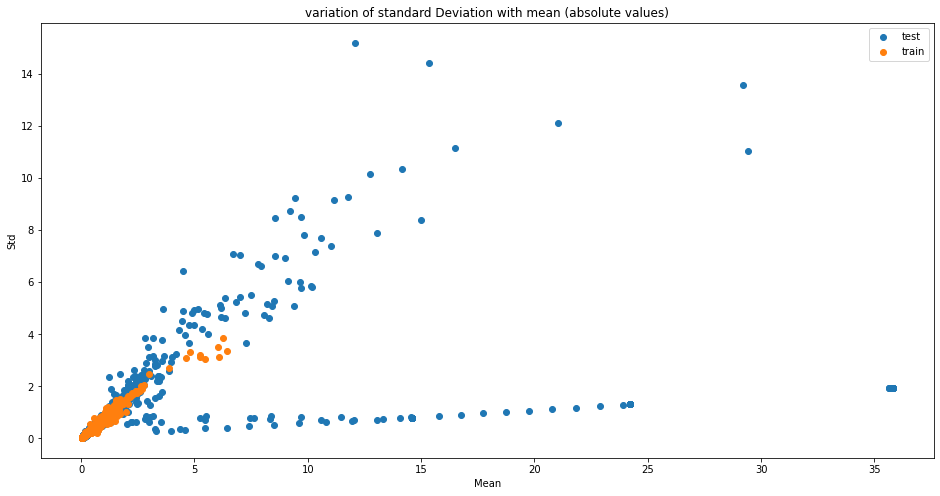

In [9]:
# After replacing all the dataset values by their absolute values.
xtrain_mean = np.abs(xtrain).mean(axis=1)
xtrain_std = np.abs(xtrain).std(axis=1)
df_xtrain_mean= pd.DataFrame(xtrain_mean, columns = ['mean'])
df_xtrain_std= pd.DataFrame(xtrain_std, columns = ['std'])

xtest_mean = np.abs(xtest).mean(axis=1)
xtest_std = np.abs(xtest).std(axis=1)
df_xtest_mean= pd.DataFrame(xtest_mean, columns = ['mean'])
df_xtest_std= pd.DataFrame(xtest_std, columns = ['std'])

plt.figure(figsize = (16,8))
plt.scatter(df_xtest_mean,df_xtest_std, label = 'test')
plt.scatter(df_xtrain_mean,df_xtrain_std, label = 'train')

plt.xlabel('Mean')
plt.ylabel('Std')  
plt.title('variation of standard Deviation with mean (absolute values)')
plt.legend()
plt.show()

## **3 - Features Engineering** 




### 3.1 - Features Standardisation

In [0]:

scaler = preprocessing.StandardScaler().fit(xtrain)
xtrain= scaler.transform(xtrain)
xtest= scaler.transform(xtest)

xtrain = pd.DataFrame(xtrain)
xtest = pd.DataFrame(xtest)

### 3.2 - Dealing with constant values in the Test sets

**Comments**: Some observations from the test set happened to have a constant values. One in particularly (index no.2019) had the constant value 0. I increased their values so that they are detected as anomalies and don't create NaN Values when used as denominator of a division 

In [0]:
xtest.iloc[2019,:]=0.05    ##value is 0 on observation 2019

In [0]:
constant_id = [1945,1960,1971,1996,1938,2002,2019,2040,2107,2109,2124,2156,2160,2175,2196,2201,2266,2292,2297,2313,2320,2368,2372,2379,2444,2464,2470,2507]

xtest.iloc[constant_id,:]= 10

### 3.3 - PCA 
**Comments** : PCA was initially applied on the training set before being fef into the model to get the prediction. The score improved from 0.50 to 0.65 but afterwards, I mainly focused my efforts into extracting and creating Features since this skyrocketted the performance.

In [30]:
pca = PCA()
pca.fit(xtrain_concat)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum>= 0.90) +1
d

2

In [0]:
# PCA transform
pca1 = PCA(n_components = d, whiten = True)   #10
pca1.fit(xtrain_concat) #xtrain[:100,:])
xtrain_concat_fpca = pca1.fit_transform(xtrain_concat) #xtrain[:100,:])
xtest_concat_fpca = pca1.transform(xtest_concat)

### 3.4 - Features Extraction

**Comments** : Below the list of all the features I extracted. They were added progressively and most of them were improving the score.
to improve the score even more, features specific to timeseries variables could be explored and added


- Max, Min, Mean, Median, Var, Std,
- Kurtosis, Skewness
- Quantiles :Q_05 Q_25, Q_75, Q95 
- difference between Q_05 & Q_95  / Q25 et Q75
- Absolute maximum
- Mean absolute deviation, median absolute deviation
- Number of pics above 0.95 of the maximum value for the observation
- Number of pics under 0.95 of the minimum value for the observation
- Number of positive and negative value
- Energy and etendu
- Hurst

commented : energy and entropy since they were decreasing the performance

In [0]:
def hurst(ts):
    """
    Returns the Hurst Exponent of the time series vector ts
    """
    # make sure we are working with an array, convert if necessary
    ts = np.asarray(ts)

    # Helper variables used during calculations
    lagvec = []
    tau = []
    # Create the range of lag values
    lags = range(2, 100)

    #  Step through the different lags
    for lag in lags:
        #  produce value difference with lag
        pdiff = np.subtract(ts[lag:],ts[:-lag])
        #  Write the different lags into a vector
        lagvec.append(lag)
        #  Calculate the variance of the difference vector
        tau.append(np.sqrt(np.std(pdiff)))

    #  linear fit to double-log graph
    m = np.polyfit(np.log10(np.asarray(lagvec)),
                   np.log10(np.asarray(tau).clip(min=0.0000000001)),
                   1)
    # return the calculated hurst exponent
    return m[0]*2.0

In [0]:
def feature_Extractor(x):
##first features I started with
  x_max = x.max(axis=1)
  x_mean = x.mean(axis=1)
  x_median = x.median(axis=1)
  x_min  =x.min(axis=1)
  x_var = x.var(axis=1)
  x_std = x.std(axis=1)

  df_x_max= pd.DataFrame(x_max  , columns = ['max'])
  df_x_mean= pd.DataFrame(x_mean, columns = ['mean'])
  df_x_median= pd.DataFrame(x_median, columns = ['median'])
  df_x_min= pd.DataFrame(x_min, columns = ['min'])
  df_x_var= pd.DataFrame(x_var, columns = ['var'])
  df_x_std= pd.DataFrame(x_std, columns = ['std'])

  list_feature = [df_x_max,df_x_mean,df_x_median,df_x_min,df_x_std,df_x_var]
  #df_x_max,df_x_mean,df_x_median,df_x_min,df_x_var,df_x_std

  # added skewness and curtosis
  x_skew = skew(x, axis = 1)
  x_kurt = kurtosis(x,axis = 1)

  df_x_skew = pd.DataFrame(x_skew, columns =['skew'])
  df_x_kurt = pd.DataFrame(x_kurt, columns =['kurtosis'])

  list_feature.extend([df_x_skew,df_x_kurt])

  #added quartiles, 
  x_q1=np.quantile(x, .25, axis =1)
  x_q3=np.quantile(x, .75, axis =1)
  
  df_x_q1 = pd.DataFrame(x_q1, columns =['q1'])
  df_x_q3 = pd.DataFrame(x_q1, columns =['q3'])

  list_feature.extend([df_x_q1,df_x_q3])
  
  #added new quartiles , absolute maximum, 
  x_q05=np.quantile(x, .05, axis =1)
  x_q95=np.quantile(x, .95, axis =1)
  x_diff_quant = x_q95-x_q05 
  x_max_abs= x.abs().max(axis =1)

  df_x_q05 = pd.DataFrame(x_q05, columns =['q05'])
  df_x_q95 = pd.DataFrame(x_q95, columns =['q95'])
  df_x_diff_quant = pd.DataFrame(x_diff_quant, columns = ['diff_quant'])
  df_x_max_abs = pd.DataFrame(x_max_abs, columns =['max_abs'])

  list_feature.extend([df_x_q05,df_x_q95])
  list_feature.extend([df_x_diff_quant,df_x_max_abs])

  #added Mean Absolute deviation, Median absolute deviation 
  x_med_ad= median_absolute_deviation(x, axis=1)
  x_diff_quant2 = x_q3 - x_q1
  x_mad = x.mad(axis=1) 

  df_x_med_ad =pd.DataFrame(x_diff_quant2,columns= ['median_ad'])
  df_x_mad= pd.DataFrame(x_mad,columns=['mean_ad'])
  df_x_diff_quant2 = pd.DataFrame(x_diff_quant2, columns = ['diff_interquart'])

  list_feature.extend([df_x_med_ad,df_x_mad,df_x_diff_quant2])
  
  #added extreme_min and extreme_max
  x_extreme_max = x.where(x>0.95*xtrain.max(axis =1).max(), axis =1 ).count(axis =1)    #   MAYBE it's the max value not per row but for all the dataframe
  x_extreme_min = x.where(x<0.95*xtrain.min(axis =1).min(), axis =1 ).count(axis =1)    #

  df_extreme_max = pd.DataFrame(x_extreme_max, columns= ['df_extreme_max'])
  df_extreme_min = pd.DataFrame(x_extreme_min, columns= ['df_extreme_min'])

  #list_feature.extend([df_extreme_max,df_extreme_min])

  #added pos and neg values
  x_neg =x.lt(0, axis =1).sum(axis =1)
  x_pos =x.gt(0, axis =1).sum(axis =1)

  df_x_neg = pd.DataFrame(x_neg,columns = ['negative_count'])
  df_x_pos = pd.DataFrame(x_pos,columns = ['positive_count'])

  #list_feature.extend([df_x_neg,df_x_pos])


  #added energy and etendu
  x_energy = np.diag(np.dot(x,x.T))
  x_etendu = x_max - x_min

  df_x_energy = pd.DataFrame(x_energy, columns = ['energy'])
  df_x_etendu = pd.DataFrame(x_etendu, columns = ['etendu'])

  #list_feature.extend([df_x_energy])
  #list_feature.extend([df_x_etendu])


  #added hurst
  x_hurst = x.apply(lambda x: hurst(x), axis=1)
  df_x_hurst = pd.DataFrame(x_hurst,columns = ['hurst'])

  #list_feature.extend([df_x_hurst])


  #added entropy 

  #x_permut_entropy = x.apply(lambda i : perm_entropy(i,order=3,normalize= True ),axis=1)
  #x_spectral_entropy = x.apply(lambda i : spectral_entropy(i, 100, method='welch', normalize=True),axis =1)   
  #x_svd_entropy = x.apply(lambda i : svd_entropy(i, order=3, delay=1, normalize=True),axis =1) 
  #x_sample_entropy = x.apply(lambda i :sample_entropy(i, order=2, metric='chebyshev'),axis =1) 
  #x_app_entropy = x.apply(lambda i : app_entropy(i, order=2, metric='chebyshev'),axis =1) 

  #df_x_permut_entropy = pd.DataFrame( x_permut_entropy,columns = ['permut_entropy'])
  #df_x_spectral_entropy = pd.DataFrame( x_spectral_entropy,columns = ['spectral_entropy'])
  #df_x_svd_entropy = pd.DataFrame(x_svd_entropy ,columns = ['svd_entropy'])
  #df_x_sample_entropy = pd.DataFrame(x_sample_entropy,columns = ['sample_entropy'])
  #df_app_entropy = pd.DataFrame( x_app_entropy,columns = ['approximate_entropy'])   #ERROR , to delete

  #list_feature.extend([df_x_permut_entropy,df_x_svd_entropy])



  x_concat = pd.concat(list_feature,axis =1) 

  return x_concat

### 3.5 - Transform the Dataset with the function defined above

In [0]:
xtrain_concat = feature_Extractor(xtrain)
xtest_concat = feature_Extractor(xtest)

In [0]:
#ensure there is no NaN
s= xtest_concat.isna().sum(axis =1)
s.loc[s>1]

Series([], dtype: int64)

## **4 - Model prediction**

**Summary** : LOF, Isolation Forest were initially leading, until One-Class SVM with the right hyperparameters outperformed them. 
Other methods such as Ensemble and NN were also attempted 

#### 4.1 - LOF after feature extraction

**Comments** : initially, the model was used after a PCA was applied on the dataset, but this technique was later left for an exclusive focus on features creation. Hyperparameters that helped was increasing the number of neighbors from 50 to 650

**Notable evolution of Score based on the features used** : 

- 1 - min, max, mean,median,var,std, skewness, kurtosis
 = **0.727959261869** :D

- 2 - added : quartiles q1 and q3,
with default parameter score and unscaled features = **0.728595795172**


- 3 - added : quantile 05% and 95% , absolute maximum, Mean Absolute deviation, Median absolute deviation = **0.724115342307**

- 4 - All the features : **0.792891838778**

In [0]:
#with default parameter after PCA on extracted feature
pca = PCA()
pca.fit(xtrain[:100,:])
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum>= 0.95) 

# PCA transform
pca1 = PCA(n_components = d, whiten = True)   #10
pca1.fit(xtrain) #xtrain[:100,:])
xtrain_fpca = pca1.fit_transform(xtrain) #xtrain[:100,:])
# Fit the low-dimensional method
lof1 = LocalOutlierFactor(n_neighbors = 5 ,contamination = 'auto', novelty = True)
lof1.fit(xtrain_fpca)
# Calculate anomaly score on the (PCA-transformed) test data
xtest_fpca = pca1.fit_transform(xtest)
sscore = -lof1.score_samples(xtest_fpca)

In [0]:
#with selected numbers of features
lof1 = LocalOutlierFactor(n_neighbors = 650 ,contamination = 0.5, novelty = True)
lof1.fit(xtrain_concat)
sscore = -lof1.score_samples(xtest_concat) 

In [0]:
sscore = preprocessing.MinMaxScaler().fit_transform(sscore.reshape(-1,1))

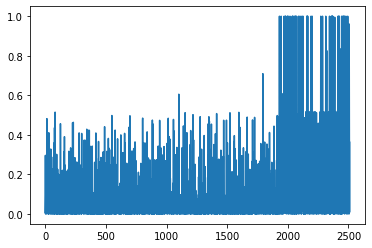

In [0]:
plt.plot(sscore)

#### 4.2 - Isolation Forest

**Comments**: Among the three models, Isolation Forest was the least performant, despite playing with the different hyperparameters. Increasing the number of estimator helped improve the score
     
**Notable evolution of Score based on the features used** : 

- 1 - min, max, mean,median,var,std :**0.726973562238**
- 2 - with same features as  bullet no.3 for LOF :  **0.74007038946**
- 3 - all the feature : **0.758435611257**

In [0]:
clf = IsolationForest(n_estimators=750,contamination =0.99, random_state=0)
clf.fit(xtrain_concat)
sscore = -clf.score_samples(xtest_concat)

#### 4.3 - One Class SVM

**Comments** : One-Class SVM ended up **being the most performant model** out of all the ones I tried. The hyperparameter nu went from 0.5 up to 0.99 since it was by increasing it that the score improved. 


**Notable evolution of Score based on the features used** : 

- 1 - min,max,mean,median,var : **0.777709283498**
- 2 - min ,max,mean,median,var, quartile : **0.78130137071**

- 3 - All the features until number of positive and negative values: : **0.792949003176**
- 4 - All the features :  **0.802305424747**  - FINAL SCORE

In [0]:
clf = svm.OneClassSVM(nu=0.99 ,kernel="rbf", gamma='scale')
clf.fit(xtrain_concat)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma='scale', kernel='rbf',
            max_iter=-1, nu=0.99, shrinking=True, tol=0.001, verbose=False)

In [0]:
sscore = -clf.score_samples(xtest_concat.iloc[:,:17])

In [0]:
#np.save('/content/drive/My Drive/Colab Notebooks/Data Challenge MDI341/sscore_0.8022',sscore)

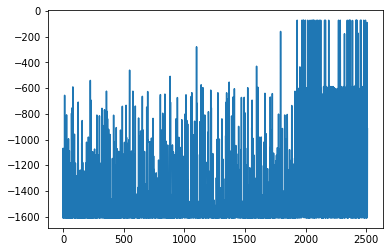

In [0]:
plt.plot(sscore)

In [0]:
0.802305424747

#### 4.4 - Ensemble Method

**Comments**:  Since the three methods had a correct score separately and the plotted prediction  looked all slightly different, I came with the idea to use an Ensemble method including the three models, the score being the mean of the ouputed scores(after normalization) 

However, none of the combinations managed to outperform the OneClass-SVM.
with all the features, the best score achieved was around 0.77

In [0]:
#predict a score with each algorithm LOF, OneClass SVM, Isolation Forest 
#normalize the score to ensure they are on the same scale

clf1 = svm.OneClassSVM(nu=0.99, kernel="rbf", gamma='scale')
clf1.fit(xtrain_concat)
sscore1 = -clf1.score_samples(xtest_concat)
sscore1_= preprocessing.MinMaxScaler().fit_transform(sscore1.reshape(-1,1))

lof1 = LocalOutlierFactor(n_neighbors = 650 ,contamination = 0.5, novelty = True)
lof1.fit(xtrain_concat)
sscore2 = -lof1.score_samples(xtest_concat)
sscore2_ = preprocessing.MinMaxScaler().fit_transform(sscore2.reshape(-1,1))

clf = IsolationForest(n_estimators=600,contamination =0.5, random_state=0)
clf.fit(xtrain_concat)
sscore3 = -clf.score_samples(xtest_concat)
sscore3_ = preprocessing.MinMaxScaler().fit_transform(sscore3.reshape(-1,1))

In [0]:
#concatenate the 3 normalized scores and output the mean 
df_sscore1= pd.DataFrame(sscore1_)
df_sscore2= pd.DataFrame(sscore2_)
df_sscore3= pd.DataFrame(sscore3_)

sscore_concat = pd.concat([df_sscore1,df_sscore2],axis=1)

sscore= sscore_concat.mean(axis =1)

#### 4.5 - Neural Network : LSTM AUTOENCODER

**Comments**: A quick attempt was made with a NN, the idea was to train a an LSTM AutoEncoder - Decoder, and then apply one of the anomaly detection function above on the hidden (latent) compressed features vector. However, creating additional features seemed to be more efficient and I didn't explore further the NN.

In [0]:
import os 
from sklearn.externals import joblib
import seaborn as sns
sns.set(color_codes =True)
import matplotlib.pyplot as plt
%matplotlib inline

from numpy.random import seed
import tensorflow as tf

from keras.layers import Input, Dropout, Dense, LSTM, TimeDistributed, RepeatVector
from keras.models import Model
from keras import regularizers

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
Using TensorFlow backend.


In [0]:
#reshape the dataset as required by Keras
X_train = xtrain_concat.to_numpy().reshape(xtrain_concat.shape[0],1,xtrain_concat.shape[1])
X_test = xtest_concat.to_numpy().reshape(xtest_concat.shape[0],1,xtest_concat.shape[1])

In [0]:
#define the autoencoder with the different layer
def autoencoder_model(X)
  inputs = Input(shape= (X.shape[1],X.shape[2]))
  L1 = LSTM(16, activation='relu', return_sequences = True, kernel_regularizer=regularizers.l2(0.00))(inputs)
  L2 = LSTM(4, activation ='relu', return_sequences = False)(L1)
  L3 = RepeatVector(X.shape[1])(L2)
  L4 = LSTM(4, activation ='relu', return_sequences = True)(L3)
  L5 = LSTM(16, activation = 'relu', return_sequences = True)(L4)
  output = TimeDistributed(Dense(X.shape[2]))(L5)
  model = Model(inputs = inputs, outputs = output)
  return model

In [0]:
model = autoencoder_model(X_train)
model.compile(optimizer = 'adam', loss = 'mse')
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 1, 10)             0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 1, 16)             1728      
_________________________________________________________________
lstm_6 (LSTM)                (None, 4)                 336       
_________________________________________________________________
repeat_vector_2 (RepeatVecto (None, 1, 4)              0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 1, 4)              144       
_________________________________________________________________
lstm_8 (LSTM)                (None, 1, 16)             1344      
_________________________________________________________________
time_distributed_2 (TimeDist (None, 1, 10)             170 

In [0]:
nb_epochs =100
batch_size = 10
history = model.fit(X_train, X_train, epochs = nb_epochs, batch_size =batch_size, validation_split = 0.05).history

Train on 1593 samples, validate on 84 samples
Epoch 1/100
1593/1593 [==============================] - 2s 1ms/step - loss: 4.1772 - val_loss: 2.2566
Epoch 2/100
1593/1593 [==============================] - 1s 428us/step - loss: 1.5148 - val_loss: 1.0774
Epoch 3/100
1593/1593 [==============================] - 1s 433us/step - loss: 0.4849 - val_loss: 1.0054
Epoch 4/100
1593/1593 [==============================] - 1s 430us/step - loss: 0.3188 - val_loss: 0.9894
Epoch 5/100
1593/1593 [==============================] - 1s 422us/step - loss: 0.2657 - val_loss: 0.9813
Epoch 6/100
1593/1593 [==============================] - 1s 420us/step - loss: 0.2406 - val_loss: 0.9613
Epoch 7/100
1593/1593 [==============================] - 1s 438us/step - loss: 0.2290 - val_loss: 0.9776
Epoch 8/100
1593/1593 [==============================] - 1s 418us/step - loss: 0.2234 - val_loss: 0.9634
Epoch 9/100
1593/1593 [==============================] - 1s 424us/step - loss: 0.2274 - val_loss: 0.9600
Epoch 10/10

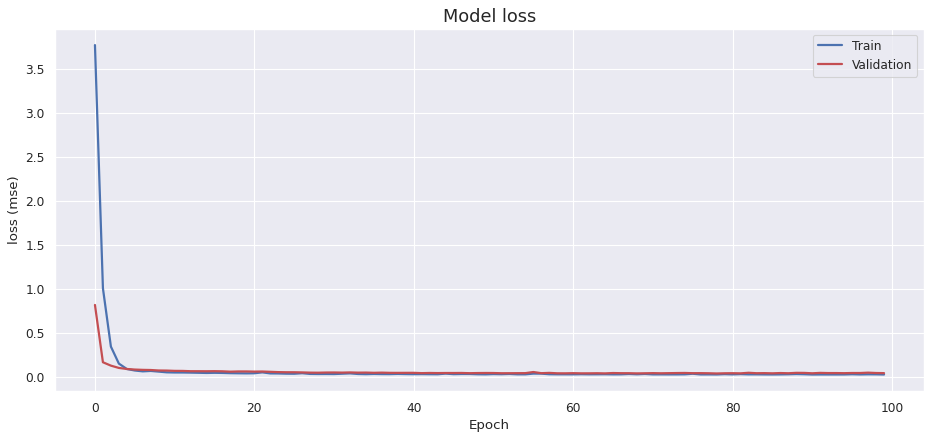

In [0]:
## plotting the train and validation Loss per epoch
fix, ax = plt.subplots(figsize = (14,6), dpi =80)
ax.plot(history['loss'],'b',label= 'Train', linewidth =2)
ax.plot(history['val_loss'],'r', label = 'Validation', linewidth = 2)
ax.set_title('Model loss', fontsize =16)
ax.set_ylabel('loss (mse)')
ax.set_xlabel('Epoch')
ax.legend(loc = 'upper right')
plt.show()

(0.0, 0.5)

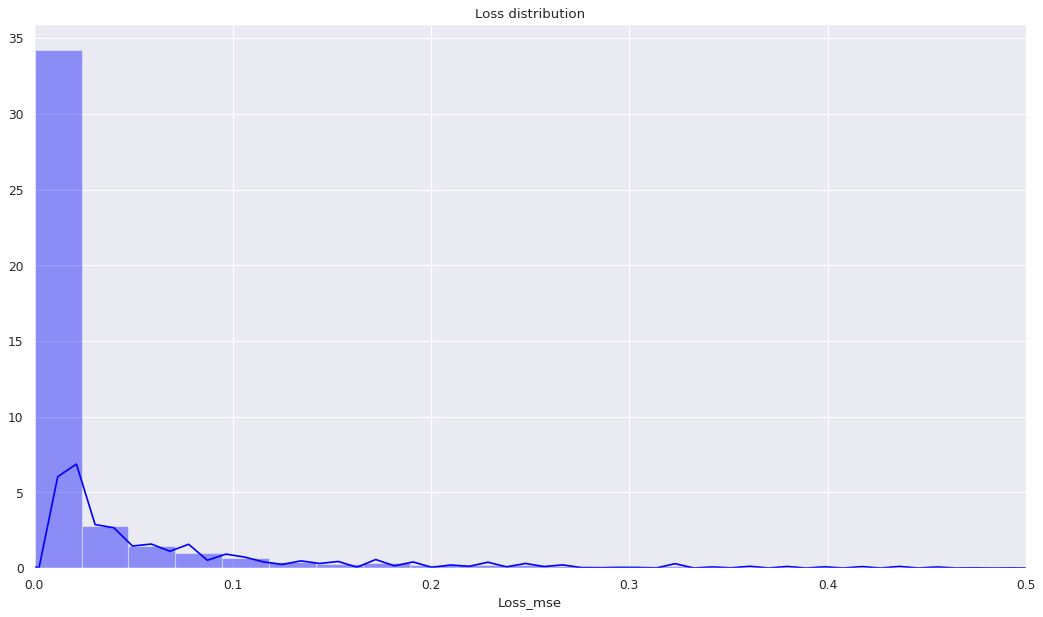

In [0]:
#plotting the Loss distribution on the train set
X_pred = model.predict(X_train)
X_pred = X_pred.reshape(X_pred.shape[0],X_pred.shape[2])
X_pred = pd.DataFrame(X_pred, columns = xtrain_concat.columns)
X_pred.index = xtrain_concat.index

scored = pd.DataFrame(index= xtrain_concat.index)
Xtrain = X_train.reshape(X_train.shape[0],X_train.shape[2])
scored['Loss_mse'] = np.mean(np.square(X_pred-Xtrain),axis =1 )
plt.figure(figsize=(16,9), dpi = 80)
plt.title('Loss distribution')

sns.distplot(scored['Loss_mse'],bins =50, kde = True, color = 'blue');
plt.xlim([0.0,.5])

In [0]:
#calculate the loss on the test set
X_pred = model.predict(X_test)
X_pred = X_pred.reshape(X_pred.shape[0],X_pred.shape[2])
X_pred = pd.DataFrame(X_pred, columns = xtest_concat.columns)
X_pred.index = xtest_concat.index

scored = pd.DataFrame(index= xtest_concat.index)
Xtest = X_test.reshape(X_test.shape[0],X_test.shape[2])
scored['Loss_mse'] = np.mean(np.square(X_pred-Xtest),axis =1 )
scored['Threshold'] = 0.1
scored['Anomaly'] = scored['Loss_mse'] > scored['Threshold']
scored.shape
#plt.figure(figsize=(16,9), dpi = 80)
#plt.title('Loss distribution')

#sns.distplot(scored['Loss_mse'],bins =50, kde = True, color = 'blue');
#plt.xlim([0.0,.5])

(2511, 3)

## **5 - Prepare a file for submission**

**Comments**: Saving the prediction in a csv file to submit it for evaluation.

In [0]:
# Save the anomaly scores to file
print(sscore.shape)
np.savetxt('ytest_challenge_hiro.csv', sscore, fmt = '%1.6f', delimiter=',')

(2511,)
